- this notebook is to run KMeans so i can do other stuff whilst it runs

In [1]:
import importlib
import all_funcs
importlib.reload(all_funcs)
from all_funcs import *

In [2]:
event_time_padded_NS = unpickle("event_time_padded_NS")
DWT_rec_padded_NS = unpickle("DWT_rec_padded_NS")

event_time_padded_NRNS = unpickle("event_time_padded_NRNS2")
DWT_rec_padded_NRNS = unpickle("DWT_rec_padded_NRNS2")

In [86]:
len(event_time_padded_NS)

1423

### NS clustering

In [5]:


# Assuming time_series_data is your dataset, a list or array of time series
scaler = TimeSeriesScalerMeanVariance()
scaled_time_series_data = scaler.fit_transform(np.array(DWT_rec_padded_NS))
# DTW
n_clusters = 2

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=5, n_jobs=-1)

# Fit the model to your data
clusters = model.fit_predict(scaled_time_series_data)

In [8]:
save_with_pickle("model_NS.pkl", model)

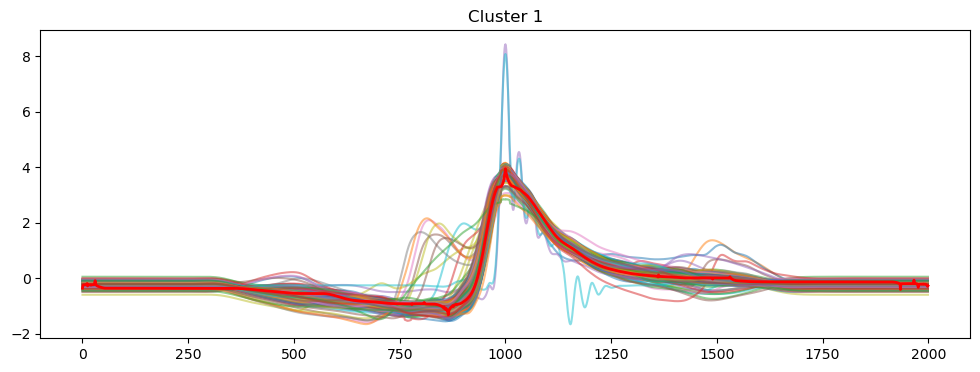

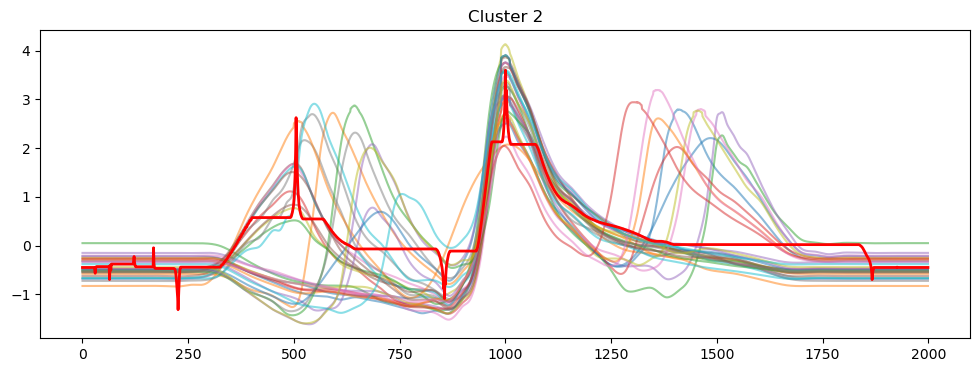

In [6]:
# DTW
for cluster_idx in range(n_clusters):
    plt.figure(figsize=(12, 4))
    plt.title(f"Cluster {cluster_idx + 1}")

    # Plot each time series in the cluster
    for i, series in enumerate(scaled_time_series_data[clusters == cluster_idx]):
        plt.plot(series.ravel(), alpha=0.5)

    # Plot the centroid
    plt.plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2)

    plt.show()

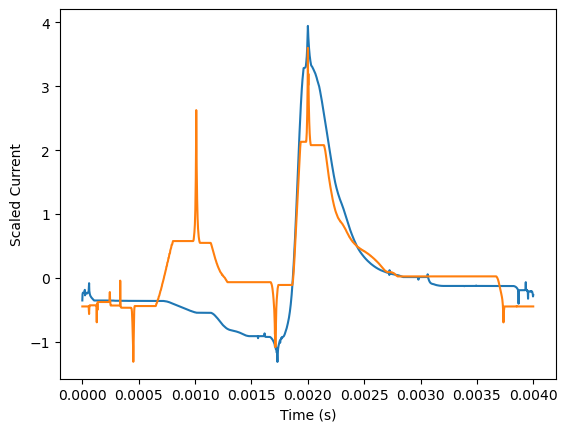

In [7]:
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[0].ravel())
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[1].ravel())
plt.xlabel("Time (s)")
plt.ylabel("Scaled Current")
plt.show()

In [40]:
# Assuming time_series_data is your dataset, a list or array of time series
scaler = TimeSeriesScalerMeanVariance()
scaled_time_series_data = scaler.fit_transform(np.array(DWT_rec_padded_NS))

n_clusters = 4

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=5, n_jobs=-1)

# Fit the model to your data
clusters = model.fit_predict(scaled_time_series_data)

In [69]:
silhouette_scores

[]

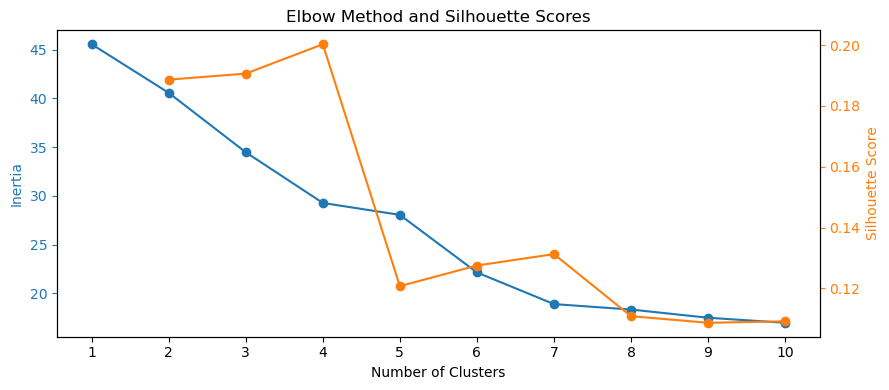

In [85]:
scaler = TimeSeriesScalerMeanVariance()
scaled_time_series_data = scaler.fit_transform(np.array(DWT_rec_padded_NS))
flattened_data = np.array([series.flatten() for series in scaled_time_series_data])


num_clusters_range = range(1, 11)  # Adjust the range as needed
models_dic = {}
labels_dic = {}

inertias = []
silhouette_scores = []

for n_clusters in num_clusters_range:
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10, n_jobs=-1, random_state=42)#init='k-means++')
    #‘k-means++’ : selects initial cluster centroids using sampling based on an empirical 
    # probability distribution of the points’ contribution to the overall inertia. 
    # This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. 
    # It differs from the vanilla k-means++ by making several trials at each sampling step and 
    # choosing the best centroid among them.
    
    labels = model.fit_predict(flattened_data)
    
    models_dic[f"n={n_clusters}"] = model
    labels_dic[f"n={n_clusters}"] = model.labels_

    inertias.append(model.inertia_)
    
    if n_clusters == 1:
        silhouette_score_value = None
    else:
        silhouette_score_value = silhouette_score(flattened_data, labels)
        
    silhouette_scores.append(silhouette_score_value)

fig, ax1 = plt.subplots(figsize=(9, 4))

# Plotting Inertia on the left y-axis
ax1.plot(num_clusters_range, inertias, color='#1f77b4', marker='o')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='#1f77b4')
ax1.tick_params('y', colors='#1f77b4')
ax1.set_xticks(num_clusters_range)

# Create another y-axis for the Silhouette Score
ax2 = ax1.twinx()
ax2.plot(num_clusters_range, silhouette_scores, color='#ff7f0e', marker='o')
ax2.set_ylabel('Silhouette Score', color='#ff7f0e')
ax2.tick_params('y', colors="#ff7f0e")

plt.title('Elbow Method and Silhouette Scores')
plt.tight_layout()
#plt.savefig("MSci_python_images/NS_elbow_silhouette.png", dpi=300)
plt.show()

In [83]:
def plot_timeseriesKMeans(num_clusters, file_name = None):
    model = models_dic[f"n={num_clusters}"]
    labels = labels_dic[f"n={num_clusters}"]
    # model = models_dic[f"n={num_clusters}"]
    # labels = labels_dic[f"n={num_clusters}"]

    # Set up the subplot grid: one row for each cluster and one for the centroids
    fig, axs = plt.subplots(num_clusters + 1, 1, figsize=(10, 3 * (num_clusters + 1)))#, dpi = 300)

    for cluster_idx in range(num_clusters):
        axs[cluster_idx].set_title(f"Cluster {cluster_idx + 1}")

        # Plot each time series in the cluster
        for series in flattened_data[labels == cluster_idx]:
            axs[cluster_idx].plot(series.ravel(), alpha=0.5)

        # Plot the centroid
        axs[cluster_idx].plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2, label = f"Cluster centroid {cluster_idx + 1}")
        axs[cluster_idx].set_xlabel("Data Index")
        axs[cluster_idx].set_ylabel("Scaled Current")
        axs[cluster_idx].legend()

    # Plot all centroids in the last subplot
    axs[num_clusters].set_title("All Cluster Centroids")
    for cluster_idx in range(num_clusters):
        axs[num_clusters].plot(np.linspace(0, 2000 * 2e-6, 2000), model.cluster_centers_[cluster_idx].ravel(), label=f'Centroid {cluster_idx + 1}')

    axs[num_clusters].set_xlabel("Time (s)")
    axs[num_clusters].set_ylabel("Scaled Current")
    axs[num_clusters].legend()

    plt.tight_layout()
    if file_name:
        plt.savefig("MSci_python_images/" + file_name + ".png", dpi = 300)
    plt.show()

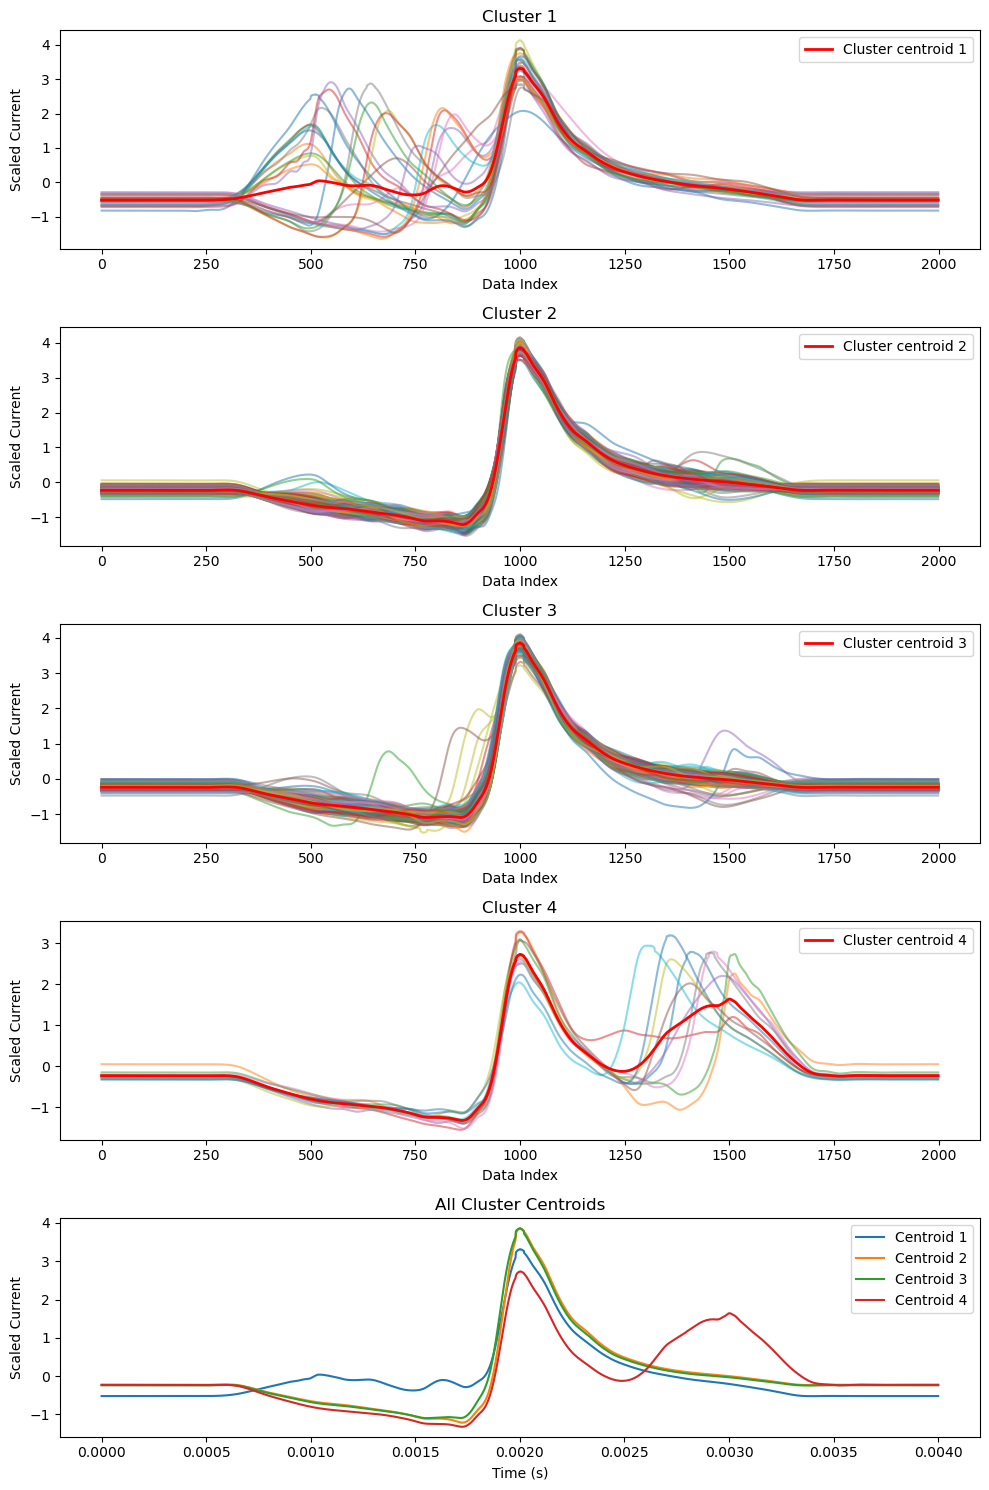

In [84]:
plot_timeseriesKMeans(4, file_name="NS_KMeans_4")

In [62]:
len(scaled_time_series_data[labels_dic["n=4"] == 1])

1382

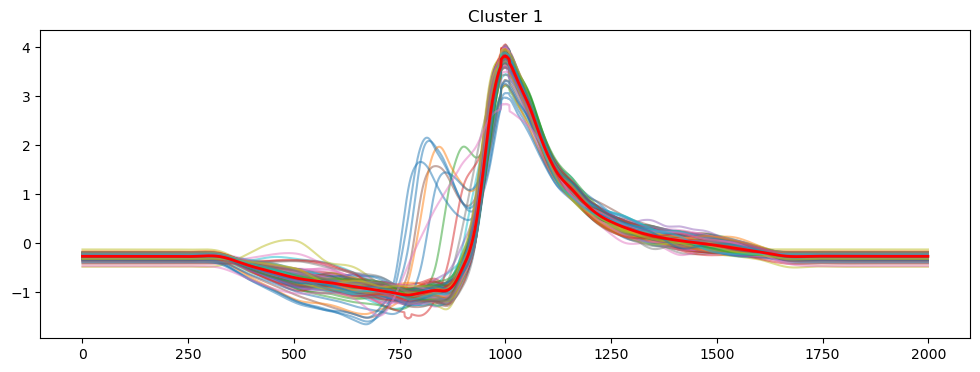

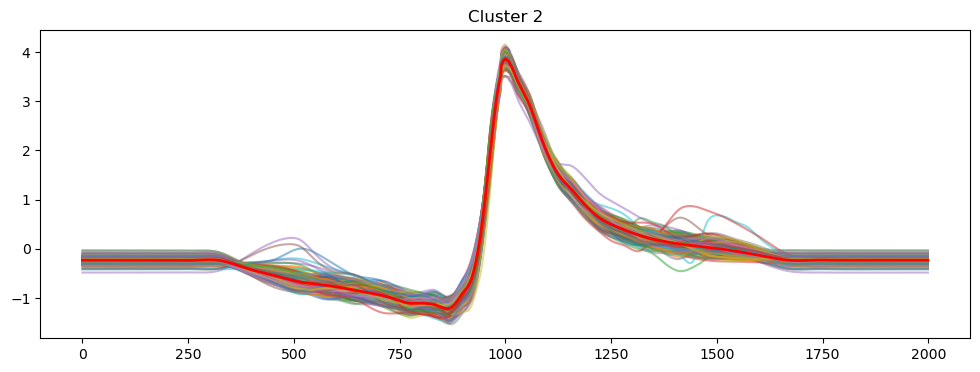

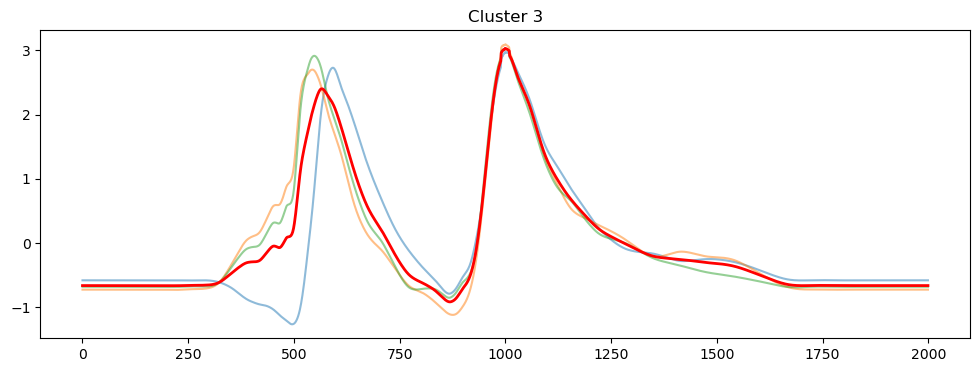

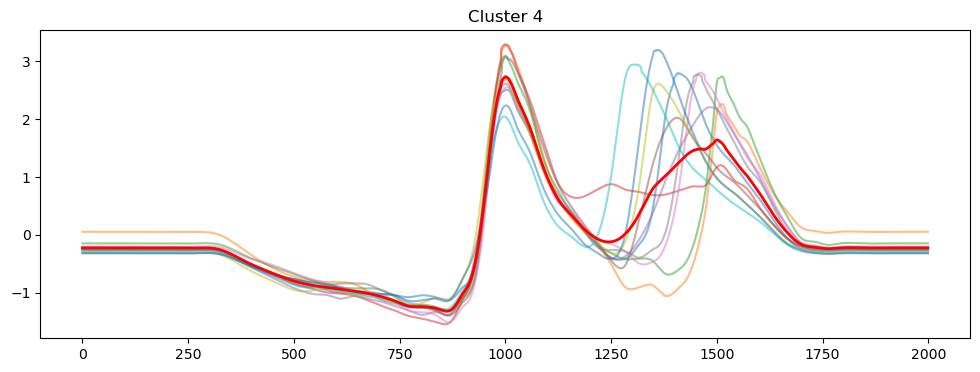

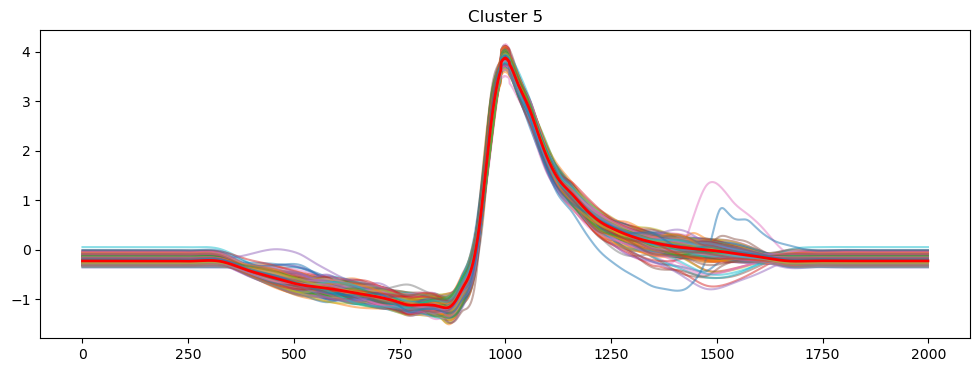

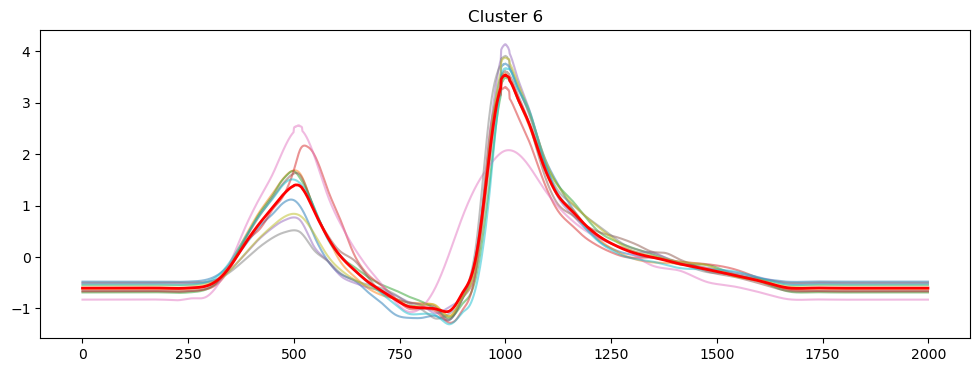

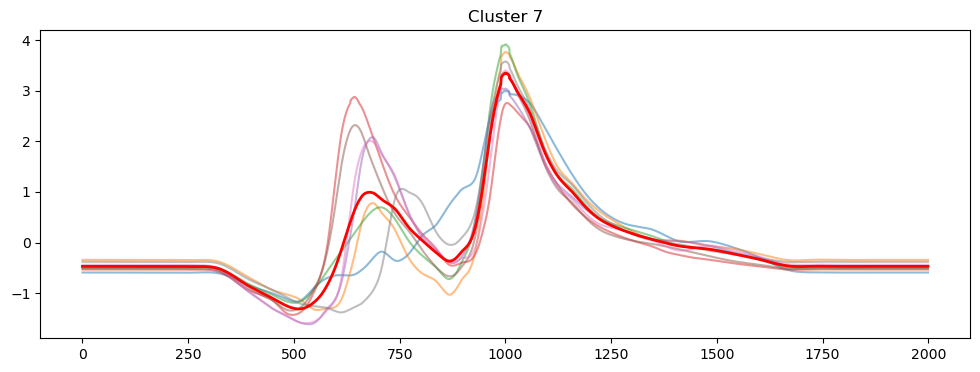

In [41]:
for cluster_idx in range(n_clusters):
    plt.figure(figsize=(12, 4))
    plt.title(f"Cluster {cluster_idx + 1}")

    # Plot each time series in the cluster
    for i, series in enumerate(scaled_time_series_data[clusters == cluster_idx]):
        plt.plot(series.ravel(), alpha=0.5)

    # Plot the centroid
    plt.plot(model.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2)

    plt.show()

In [ ]:
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[0].ravel())
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[1].ravel())
plt.xlabel("Time (s)")
plt.ylabel("Scaled Current")
plt.show()

In [34]:
len(scaled_time_series_data[clusters == 0])

644

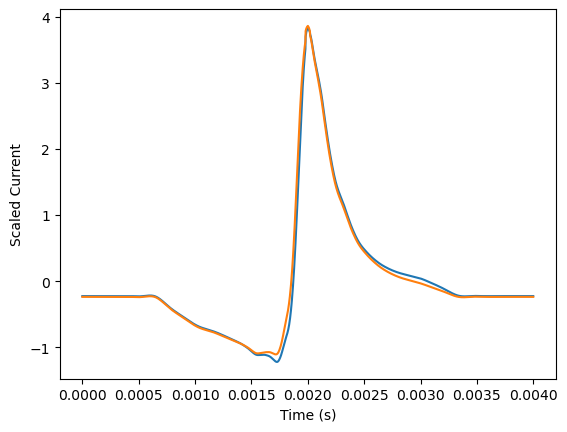

In [31]:
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[0].ravel())
plt.plot(np.linspace(0, 2000*2e-6, 2000), model.cluster_centers_[1].ravel())
plt.xlabel("Time (s)")
plt.ylabel("Scaled Current")
plt.show()

In [ ]:
maxxxx = 0

idx_max = 0
for i in range(len(DWT_rec_padded_NS)):
    max_val = np.max(DWT_rec_padded_NS[i])
    if max_val > maxxxx:
        maxxxx = max_val
        idx_max = i

In [ ]:
maxxxx, idx_max

(249.86993408203625, 1028)

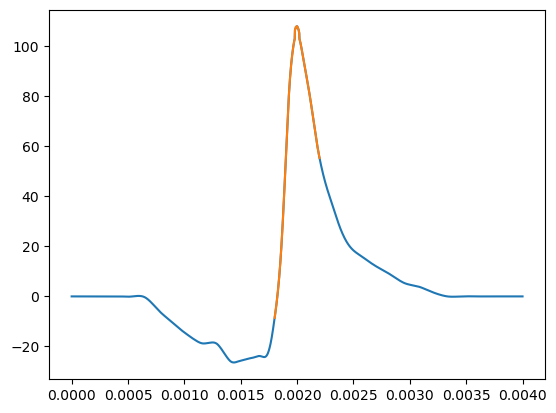

In [8]:
plt.plot(np.linspace(0, 2000*2e-6, 2000), DWT_rec_padded_NS[456])
plt.plot(np.linspace(0, 2000*2e-6, 2000)[900:1100], DWT_rec_padded_NS[456][900:1100])

In [64]:
np.delete(DWT_rec_padded_NS, 456)
np.delete(event_time_padded_NS, 456)
np.delete(DWT_rec_padded_NS, 814)
np.delete(event_time_padded_NS, 814)

array([ 0.0741,  0.0741,  0.0741, ..., 59.8956, 59.8956, 59.8956])

In [65]:
len(event_time_padded_NS)

1426

In [21]:
DWT_rec_padded_NS.pop(813)
event_time_padded_NS.pop(813)


array([8.4835, 8.4835, 8.4835, ..., 8.4875, 8.4875, 8.4875])

In [7]:
# remove events
DWT_rec_padded_NS.pop(456)
event_time_padded_NS.pop(456)
DWT_rec_padded_NS.pop(814)
event_time_padded_NS.pop(814)


array([8.6828, 8.6828, 8.6828, ..., 8.6867, 8.6868, 8.6868])

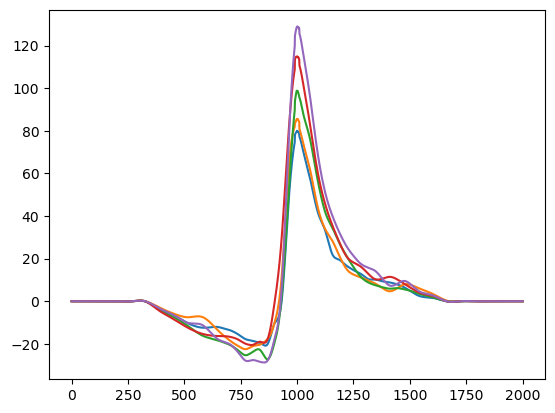

In [22]:
for i in range(810,815):
    plt.plot(np.linspace(0, 2000, 2000), DWT_rec_padded_NS[i])

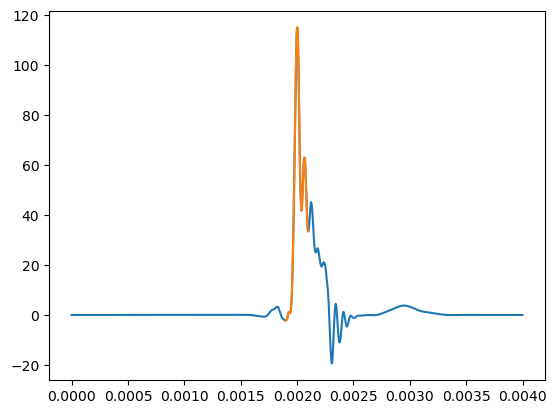

In [20]:
plt.plot(np.linspace(0, 2000*2e-6, 2000), DWT_rec_padded_NS[813])
plt.plot(np.linspace(0, 2000*2e-6, 2000)[950:1050], DWT_rec_padded_NS[813][950:1050])

### NRNS ML

In [2]:
features_list_NRNS = unpickle("features_list_NRNS.pkl")
features_list_NRNS_norm2 = unpickle("features_list_NRNS_norm2.pkl")
features_list_NRNS_norm = unpickle("features_list_NRNS_norm.pkl")

labels_NRNS = unpickle("labels_NRNS.pkl")

Models

In [4]:
X_train_02_bior33_NRNS, X_test_02_bior33_NRNS, y_train_02_bior33_NRNS, y_test_02_bior33_NRNS, y_pred_02_bior33_NRNS, search_02_bior33_NRNS, best_params_02_bior33_NRNS = hyperparam_op(
    "XG", "random", features_list_NRNS, labels_NRNS)


XG best params using random: {'XG__colsample_bytree': 0.8, 'XG__gamma': 0.3, 'XG__learning_rate': 0.07673852499523488, 'XG__max_depth': 18, 'XG__min_child_weight': 7, 'XG__n_estimators': 708, 'XG__subsample': 0.5}
Average CV accuracy: 1.0 ± 0.0


In [26]:
X_train_02_bior33_NRNS_norm, X_test_02_bior33_NRNS_norm, y_train_02_bior33_NRNS_norm, y_test_02_bior33_NRNS_norm, y_pred_02_bior33_NRNS_norm, search_02_bior33_NRNS_norm, best_params_02_bior33_NRNS_norm = hyperparam_op(
    "XG", "random", features_list_NRNS_norm, labels_NRNS)


XG best params using random: {'XG__colsample_bytree': 0.5, 'XG__gamma': 0.2, 'XG__learning_rate': 0.3565320964602151, 'XG__max_depth': 5, 'XG__min_child_weight': 1, 'XG__n_estimators': 104, 'XG__subsample': 0.75}
Average CV accuracy: 0.9992700729927007 ± 0.0


In [3]:
X_train_02_bior33_NRNS_norm, X_test_02_bior33_NRNS_norm, y_train_02_bior33_NRNS_norm, y_test_02_bior33_NRNS_norm, y_pred_02_bior33_NRNS_norm, search_02_bior33_NRNS_norm, best_params_02_bior33_NRNS_norm = hyperparam_op(
    "XG", "random", features_list_NRNS_norm, labels_NRNS)


XG best params using random: {'XG__colsample_bytree': 0.5, 'XG__gamma': 0.2, 'XG__learning_rate': 0.3565320964602151, 'XG__max_depth': 5, 'XG__min_child_weight': 1, 'XG__n_estimators': 104, 'XG__subsample': 0.75}
Average CV accuracy: 0.9992700729927007 ± 0.0


train

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1140
         1.0       1.00      1.00      1.00       229

    accuracy                           1.00      1369
   macro avg       1.00      1.00      1.00      1369
weighted avg       1.00      1.00      1.00      1369

Accuracy: 1.0
Specificity: 1.0


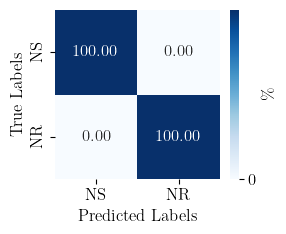

In [54]:
print(classification_report(y_train_02_bior33_NRNS, y_pred_02_bior33_NRNS))
print("Accuracy:", accuracy_score(y_train_02_bior33_NRNS, y_pred_02_bior33_NRNS))


cm_CV_XG_02_bior33_NRNS = confusion_matrix(y_train_02_bior33_NRNS, y_pred_02_bior33_NRNS)
cm_percentages_bior33_NRNS = cm_CV_XG_02_bior33_NRNS / cm_CV_XG_02_bior33_NRNS.sum(axis=1)[:, np.newaxis]

tn, fp, fn, tp = cm_CV_XG_02_bior33_NRNS.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

classes = ['NS', 'NR']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_bior33_NRNS, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_XG_02_bior33_cm_train.png", dpi=300)
plt.show()

norm train

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1140
         1.0       1.00      1.00      1.00       229

    accuracy                           1.00      1369
   macro avg       1.00      1.00      1.00      1369
weighted avg       1.00      1.00      1.00      1369

Accuracy: 0.9992695398100804
Specificity: 0.9991228070175439


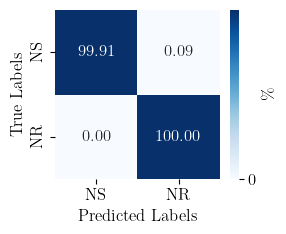

In [53]:
print(classification_report(y_train_02_bior33_NRNS_norm, y_pred_02_bior33_NRNS_norm))
print("Accuracy:", accuracy_score(y_train_02_bior33_NRNS_norm, y_pred_02_bior33_NRNS_norm))


cm_CV_XG_02_bior33_NRNS_norm = confusion_matrix(y_train_02_bior33_NRNS_norm, y_pred_02_bior33_NRNS_norm)
cm_percentages_bior33_NRNS_norm = cm_CV_XG_02_bior33_NRNS_norm / cm_CV_XG_02_bior33_NRNS_norm.sum(axis=1)[:, np.newaxis]

tn, fp, fn, tp = cm_CV_XG_02_bior33_NRNS_norm.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

classes = ['NS', 'NR']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_bior33_NRNS_norm, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_XG_02_bior33_cm_train_norm.png", dpi=300)
plt.show()

best model test

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       286
         1.0       1.00      0.98      0.99        57

    accuracy                           1.00       343
   macro avg       1.00      0.99      0.99       343
weighted avg       1.00      1.00      1.00       343

Accuracy: 0.9970845481049563


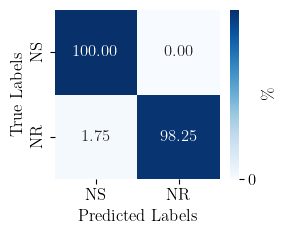

In [52]:
best_model_XG_random_02_bior33_NRNS = search_02_bior33_NRNS.best_estimator_
predictions_best_model_XG_02_bior33_NRNS = best_model_XG_random_02_bior33_NRNS.predict(X_test_02_bior33_NRNS)

cm_best_model_XG_02_bior33_NRNS = confusion_matrix(y_test_02_bior33_NRNS, predictions_best_model_XG_02_bior33_NRNS)
cm_percentages_best_model_XG_02_bior33_NRNS = cm_best_model_XG_02_bior33_NRNS / cm_best_model_XG_02_bior33_NRNS.sum(axis=1)[:, np.newaxis]

print(classification_report(y_test_02_bior33_NRNS, predictions_best_model_XG_02_bior33_NRNS))
print("Accuracy:", accuracy_score(y_test_02_bior33_NRNS, predictions_best_model_XG_02_bior33_NRNS))

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_best_model_XG_02_bior33_NRNS, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_XG_02_bior33_cm_test.png", dpi=300)
plt.show()

norm best model test

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       286
         1.0       0.98      1.00      0.99        57

    accuracy                           1.00       343
   macro avg       0.99      1.00      0.99       343
weighted avg       1.00      1.00      1.00       343

Accuracy: 0.9970845481049563


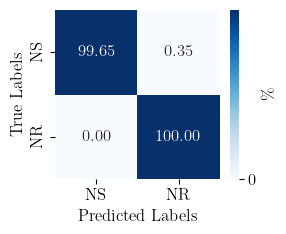

In [210]:
best_model_XG_random_02_bior33_NRNS_norm = search_02_bior33_NRNS_norm.best_estimator_
predictions_best_model_XG_02_bior33_NRNS_norm = best_model_XG_random_02_bior33_NRNS_norm.predict(X_test_02_bior33_NRNS_norm)

cm_best_model_XG_02_bior33_NRNS_norm = confusion_matrix(y_test_02_bior33_NRNS_norm, predictions_best_model_XG_02_bior33_NRNS_norm)
cm_percentages_best_model_XG_02_bior33_NRNS_norm = cm_best_model_XG_02_bior33_NRNS_norm / cm_best_model_XG_02_bior33_NRNS_norm.sum(axis=1)[:, np.newaxis]

print(classification_report(y_test_02_bior33_NRNS_norm, predictions_best_model_XG_02_bior33_NRNS_norm))
print("Accuracy:", accuracy_score(y_test_02_bior33_NRNS_norm, predictions_best_model_XG_02_bior33_NRNS_norm))

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_best_model_XG_02_bior33_NRNS_norm, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_XG_02_bior33_cm_test_norm.png", dpi=300)
plt.show()

python(1508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


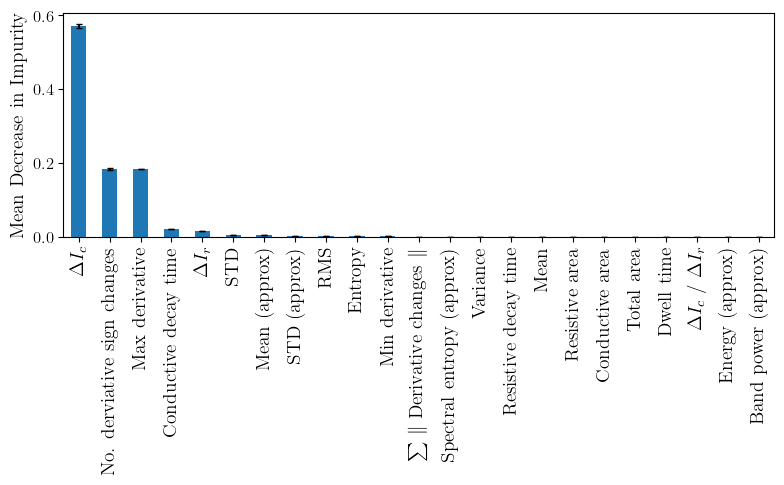

In [189]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "Dwell time", "skew", "kurtosis", "Total area", "Conductive area", "Resistive area", "Entropy", "Mean", "STD", "Variance", "RMS", "Max derivative", "Min derivative", "$\sum$ $\|$ Derivative changes $\|$", "No. derviative sign changes", "Resistive decay time", "Conductive decay time", "Mean (approx)", "STD (approx)", "Energy (approx)", "Spectral entropy (approx)", "Band power (approx)"]

result = permutation_importance(best_model_XG_random_02_bior33_NRNS, X_test_02_bior33_NRNS, y_test_02_bior33_NRNS, n_repeats=10, random_state=0, n_jobs=2)

xgboost_model = best_model_XG_random_02_bior33_NRNS.named_steps['XG']
importances_MDI = xgboost_model.feature_importances_
forest_importances = pd.Series(importances_MDI, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd = pd.Series(result.importances_std, index=feature_names)

forest_importances, forest_importances_sd = forest_importances.drop(["skew", "kurtosis"]), forest_importances_sd.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx = forest_importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances.iloc[sorted_idx].plot.bar(yerr=forest_importances_sd.iloc[sorted_idx], ax=ax, capsize=2)

for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=14)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_feature_importance_MDI_XG_02_bior33_bigfont.png", dpi=500)
plt.show()

In [7]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "Dwell time", "skew", "kurtosis", "Total area", "Conductive area", "Resistive area", "Entropy", "Mean", "STD", "Variance", "RMS", "Max derivative", "Min derivative", "$\sum$ $\|$ Derivative changes $\|$", "No. derviative sign changes", "Resistive decay time", "Conductive decay time", "Mean (approx)", "STD (approx)", "Energy (approx)", "Spectral entropy (approx)", "Band power (approx)"]


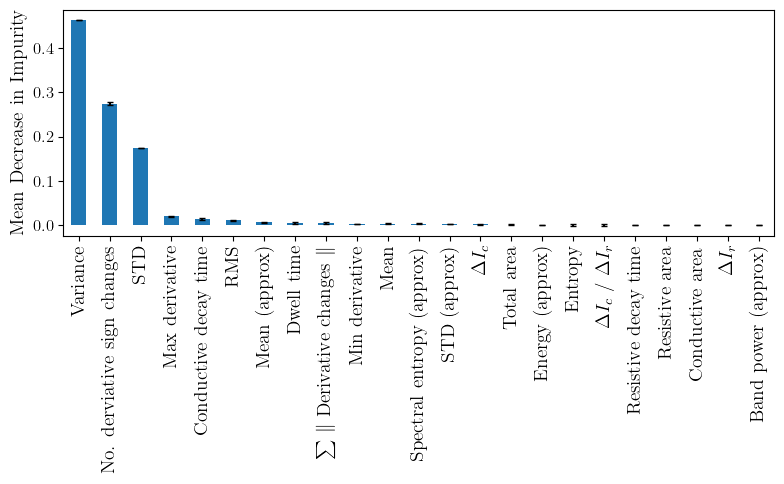

In [8]:

result_norm = permutation_importance(best_model_XG_random_02_bior33_NRNS_norm, X_test_02_bior33_NRNS_norm, y_test_02_bior33_NRNS_norm, n_repeats=10, random_state=42, n_jobs=-1)

xgboost_model_norm = best_model_XG_random_02_bior33_NRNS_norm.named_steps['XG']
importances_MDI_norm = xgboost_model_norm.feature_importances_
forest_importances_norm = pd.Series(importances_MDI_norm, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd_norm = pd.Series(result_norm.importances_std, index=feature_names)

forest_importances_norm, forest_importances_sd_norm = forest_importances_norm.drop(["skew", "kurtosis"]), forest_importances_sd_norm.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx_norm = forest_importances_norm.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances_norm.iloc[sorted_idx_norm].plot.bar(yerr=forest_importances_sd_norm.iloc[sorted_idx_norm], ax=ax, capsize=2)
for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=14)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_feature_importance_MDI_XG_02_bior33_norm.png", dpi=500)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/NRNS_feature_importance_MDI_XG_02_bior33_norm.svg")

plt.show()

python(1479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1489) MallocStackLoggin

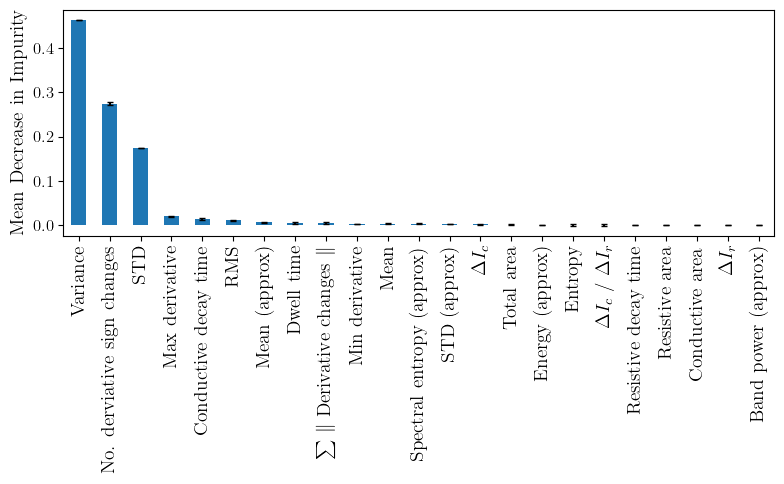

In [ ]:

result_norm = permutation_importance(best_model_XG_random_02_bior33_NRNS_norm, X_test_02_bior33_NRNS_norm, y_test_02_bior33_NRNS_norm, n_repeats=10, random_state=42, n_jobs=-1)

xgboost_model_norm = best_model_XG_random_02_bior33_NRNS_norm.named_steps['XG']
importances_MDI_norm = xgboost_model_norm.feature_importances_
forest_importances_norm = pd.Series(importances_MDI_norm, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd_norm = pd.Series(result_norm.importances_std, index=feature_names)

forest_importances_norm, forest_importances_sd_norm = forest_importances_norm.drop(["skew", "kurtosis"]), forest_importances_sd_norm.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx_norm = forest_importances_norm.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances_norm.iloc[sorted_idx_norm].plot.bar(yerr=forest_importances_sd_norm.iloc[sorted_idx_norm], ax=ax, capsize=2)
for label in ax.get_xticklabels():
    label.set_fontsize(14)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=14)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_feature_importance_MDI_XG_02_bior33_norm.png", dpi=500)
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/NRNS_feature_importance_MDI_XG_02_bior33_norm.svg")

plt.show()

CV

In [ ]:
from imblearn.pipeline import Pipeline as IMBPipeline # Use this pipeline to handle imblearn steps like SMOTE
from sklearn.metrics import log_loss, roc_auc_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scaler = RobustScaler()

    
features_list_NRNS_norm_edit = [lst[:16] + lst[17:] for lst in features_list_NRNS_norm]
#X_02_bior33 = features_list_NRNS_norm_edit #features_list_NRNS_norm
X_02_bior33 = features_list_NRNS_norm
y_02_bior33 = labels_NRNS

X_train_02_bior33, X_test_02_bior33, y_train_02_bior33, y_test_02_bior33 = train_test_split(X_02_bior33, y_02_bior33, test_size=0.3, random_state=42, stratify=y_02_bior33)


#X_train_02_bior33 = scaler.fit_transform(X_train_02_bior33)

clf_pipeline = IMBPipeline([
    ('scaler', RobustScaler()),
    ('smote', SMOTE(random_state=42)),
    ('XG', XGBClassifier(random_state=42, reg_lambda = 5, reg_alpha = 0.1))
])

# Perform k-fold CV
accuracies_02_bior33 = cross_val_score(clf_pipeline, X_train_02_bior33, y_train_02_bior33, cv=kf, scoring='accuracy', n_jobs=-1)  # Use parallel processing

clf_pipeline.fit(X_train_02_bior33, y_train_02_bior33)


# Calculate average accuracy
average_accuracy_02_bior33 = np.mean(accuracies_02_bior33)
sd_accuracy_02_bior33 = np.std(accuracies_02_bior33) / np.sqrt(len(accuracies_02_bior33))
log_loss_02_bior33 = log_loss(y_test_02_bior33, clf_pipeline.predict_proba(X_test_02_bior33))
roc_auc_02_bior33 = roc_auc_score(y_test_02_bior33, clf_pipeline.predict_proba(X_test_02_bior33)[:, 1])

print(f'Average accuracy: {average_accuracy_02_bior33:.5f} $\pm$ {sd_accuracy_02_bior33:.5f}')
print(f'Log loss: {log_loss_02_bior33:.5f}')
print(f'ROC AUC: {roc_auc_02_bior33:.5f}')


Average accuracy: 0.99833 $\pm$ 0.00106
Log loss: 0.00308
ROC AUC: 1.00000


In [165]:
feature_names = ["$\Delta I_c$", "$\Delta I_r$", "$\Delta I_c$ / $\Delta I_r$", "Dwell time", "skew", "kurtosis", "Total area", "Conductive area", "Resistive area", "Entropy", "Mean", "STD", "Variance", "RMS", "Max derivative", "Min derivative", "$\sum$ $\|$ Derivative changes $\|$", "$\sum$ Derviative sign changes", "Resistive decay time", "Conductive decay time", "Mean (approx)", "STD (approx)", "Energy (approx)", "Spectral entropy (approx)", "Band power (approx)"]

result_norm = permutation_importance(clf_pipeline, X_test_02_bior33_NRNS_norm, y_test_02_bior33_NRNS_norm, n_repeats=10, random_state=42, n_jobs=-1)

xgboost_model_norm = clf_pipeline.named_steps['XG']
importances_MDI_norm = xgboost_model_norm.feature_importances_
forest_importances_norm = pd.Series(importances_MDI_norm, index=feature_names)

# Assuming 'result.importances_std' contains the standard deviation of permutation importance
# Make sure this standard deviation is relevant or meaningful to display alongside MDI importances
forest_importances_sd_norm = pd.Series(result_norm.importances_std, index=feature_names)

forest_importances_norm, forest_importances_sd_norm = forest_importances_norm.drop(["skew", "kurtosis"]), forest_importances_sd_norm.drop(["skew", "kurtosis"])

# Sort the importances in descending order for plotting
sorted_idx_norm = forest_importances_norm.argsort()[::-1]

# Plotting
plt.figure(figsize=(8, 5))
ax = plt.gca()  # Get current axis for plotting

# Plot MDI importances with error bars from permutation importance's standard deviation
forest_importances_norm.iloc[sorted_idx_norm].plot.bar(yerr=forest_importances_sd_norm.iloc[sorted_idx_norm], ax=ax, capsize=2)

ax.set_ylabel("Mean Decrease in Impurity")
plt.tight_layout()
#plt.savefig("MSci_python_images/feature_importance_MDI_XG_02_bior33.png", dpi=300)
plt.show()

NameError: name 'clf_pipeline' is not defined

Specificity: 1.0


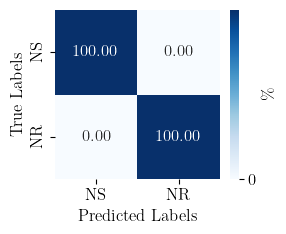

In [ ]:
y_pred_02_bior33 = clf_pipeline.predict(X_test_02_bior33)
conf_matrix_02_bior33 = confusion_matrix(y_test_02_bior33, y_pred_02_bior33)

cm_percentages_bior33 = conf_matrix_02_bior33 / conf_matrix_02_bior33.sum(axis=1)[:, np.newaxis]

tn, fp, fn, tp = conf_matrix_02_bior33.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

classes = ['NS', 'NR']

plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages_bior33, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_XG_02_bior33_cm_percent.png", dpi=300)
plt.show()

In [ ]:
# scaler = RobustScaler()
# X_test_02_bior33_scaled = scaler.fit_transform(X_test_02_bior33)
pred_testtt = clf_pipeline.predict(X_test_02_bior33)


prob_predictions = clf_pipeline.predict_proba(X_test_02_bior33)[:, 1]
log_loss_val = log_loss(y_test_02_bior33, prob_predictions)
auc_score = roc_auc_score(y_test_02_bior33, prob_predictions)

print(classification_report(y_test_02_bior33, pred_testtt))
print("Accuracy:", accuracy_score(y_test_02_bior33, pred_testtt))

print("Log loss:", log_loss_val)
print("AUC score:", auc_score)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       428
         1.0       1.00      1.00      1.00        86

    accuracy                           1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514

Accuracy: 1.0
Log loss: 0.003084905416806773
AUC score: 1.0


##### Logistic regression

- paper: Log-likelihood-based Pseudo-R2 in Logistic Regression: Deriving Sample-sensitive Benchmarks

Optimization terminated successfully.
         Current function value: 0.104989
         Iterations 9


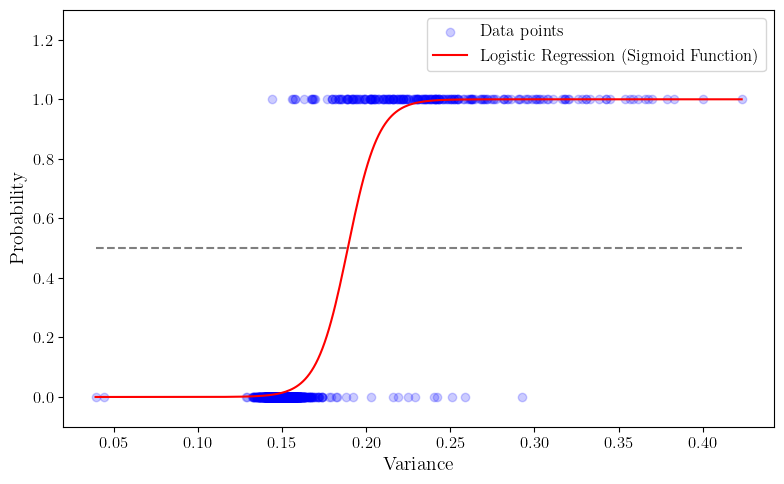

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1369
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.7675
Time:                        16:25:43   Log-Likelihood:                -143.73
converged:                       True   LL-Null:                       -618.16
Covariance Type:            nonrobust   LLR p-value:                2.353e-208
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.5604      1.335    -15.403      0.000     -23.177     -17.944
x1           108.6914      7.713     14.091      0.000      93.573     123.809


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming clf_pipeline['XG'] is your trained XGBoost model
xg_model = best_model_XG_random_02_bior33_NRNS_norm.named_steps['XG']

# Get feature importances and identify the most important feature
feature_importances = xg_model.feature_importances_
most_important_feature_index = np.argmax(feature_importances) #for automatic detection

# Extract the most important feature and target variable
X_important_feature = np.array(X_train_02_bior33_NRNS_norm)[:, most_important_feature_index]
y = y_train_02_bior33_NRNS_norm


# Fit logistic regression
X_with_intercept = sm.add_constant(X_important_feature)  # Adds a constant term to the predictor
logit_model = sm.Logit(y, X_with_intercept).fit()

# To visualize the fit, we need to create a sequence of predictions across the range of X values
# This requires calculating the sigmoid function manually or plotting probabilities for classification
x_range = np.linspace(X_important_feature.min(), X_important_feature.max(), 300)
x_range_with_intercept = sm.add_constant(x_range)

# Predicting probabilities
y_pred = logit_model.predict(x_range_with_intercept)

# Plotting
plt.figure(figsize=(8, 5))
plt.hlines(0.5, X_important_feature.min(), X_important_feature.max(), color='k', linestyle='--', alpha=0.5)
plt.scatter(X_important_feature, y, color='blue', label='Data points', alpha = 0.2)
plt.plot(x_range, y_pred, color='red', label='Logistic Regression (Sigmoid Function)')

plt.xlabel(f'{feature_names[most_important_feature_index]}', fontsize=14)
plt.ylabel('Probability', fontsize=14)
#plt.title('Logistic Regression on the Most Important Feature')
plt.legend()
#plt.xticks(np.arange(2,21,2))
plt.ylim(-0.1, 1.3)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_1Dlogistic_regression.png", dpi=500)
plt.show()

# You can print the summary of the logistic regression model to see how it performs
print(logit_model.summary())

y_pred_probs = logit_model.predict(X_with_intercept)

# Convert probabilities to class predictions using 0.5 as the threshold
y_pred_class = (y_pred_probs >= 0.5).astype(int)



Accuracy: 0.9737609329446064
Confusion Matrix:
[[282   4]
 [  5  52]]
Precision: 0.9285714285714286
Recall: 0.9122807017543859
F1 Score: 0.9203539823008849


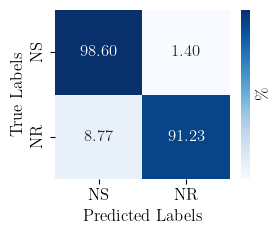

In [180]:
X_test_important_feature = np.array(X_test_02_bior33_NRNS_norm)[:, most_important_feature_index]
X_test_with_intercept = sm.add_constant(X_test_important_feature)

# Predicting probabilities for the test set
y_test_pred_probs = logit_model.predict(X_test_with_intercept)

# Convert probabilities to class labels based on a threshold (e.g., 0.5)
y_test_pred_labels = np.where(y_test_pred_probs > 0.5, 1, 0)

accuracy = accuracy_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)

conf_matrix = confusion_matrix(y_test_02_bior33_NRNS_norm, y_test_pred_labels)

precision = precision_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)

recall = recall_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)

f1 = f1_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)

# fpr, tpr, thresholds = roc_curve(y_test_02_bior33_NRNS_norm, y_test_pred_probs)
# roc_auc = auc(fpr, tpr)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"AUC: {roc_auc}")

cm_percentages = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
classes = ['NS', 'NR']
plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_1Dlogreg_cm.png", dpi=300)
plt.show()


Optimization terminated successfully.
         Current function value: 0.025109
         Iterations 11


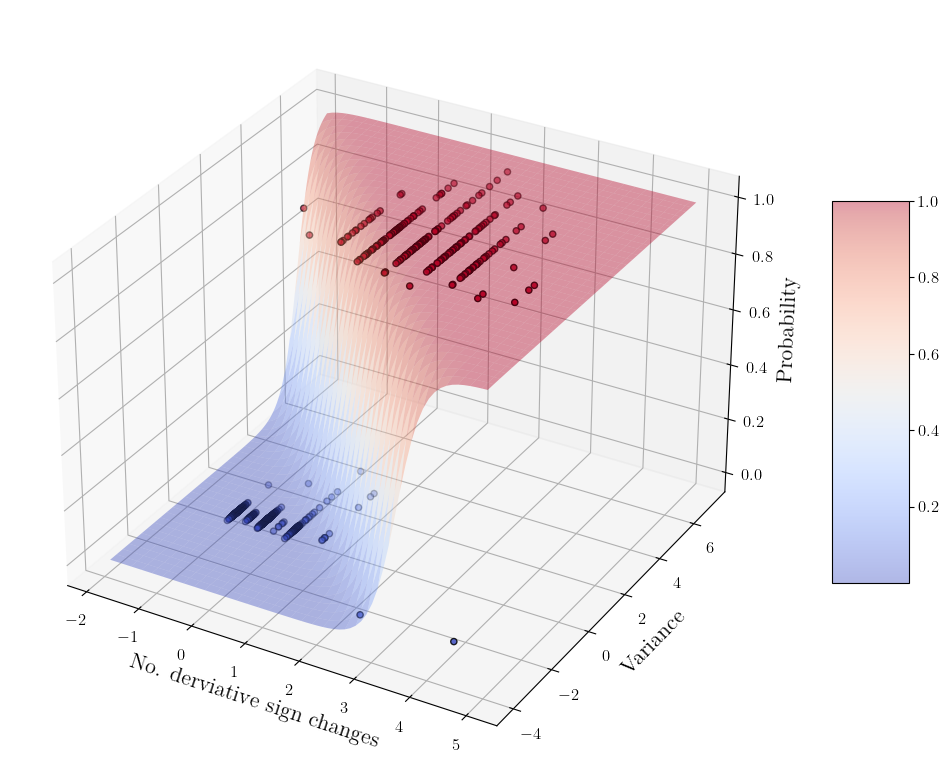

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1369
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.9444
Time:                        23:47:40   Log-Likelihood:                -34.374
converged:                       True   LL-Null:                       -618.16
Covariance Type:            nonrobust   LLR p-value:                2.925e-254
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9133      0.613     -8.010      0.000      -6.116      -3.711
x1             4.1256      0.543      7.598      0.000       3.061       5.190
x2             2.3249      0.400      5.814      0.0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming clf_pipeline['XG'] is your trained XGBoost model
xg_model = best_model_XG_random_02_bior33_NRNS_norm.named_steps['XG']

# Get feature importances and identify the top 2 features
feature_importances = xg_model.feature_importances_
top_features_indices = np.argsort(feature_importances)[-2:]  # Gets the indices of the top 2 features

# Extract the top 2 features and target variable
X_top_features = np.array(X_train_02_bior33_NRNS_norm)[:, top_features_indices]
y = y_train_02_bior33_NRNS_norm

# Scale features
scaler = StandardScaler()

X_top_features_scaled = scaler.fit_transform(X_top_features)

# Fit logistic regression with 2D features
X_with_intercept = sm.add_constant(X_top_features_scaled)  # Adds a constant term to the predictors
logit_model_2d = sm.Logit(y, X_with_intercept).fit()

# Visualization setup for 3D
x_min, x_max = X_top_features_scaled[:, 0].min() - 1, X_top_features_scaled[:, 0].max() + 1
y_min, y_max = X_top_features_scaled[:, 1].min() - 1, X_top_features_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_intercept = sm.add_constant(grid)

# Predict probabilities over the grid
probs = logit_model_2d.predict(grid_with_intercept).reshape(xx.shape)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(xx, yy, probs, cmap='coolwarm', edgecolor='none', alpha=0.4)

# Scatter plot of actual points
ax.scatter(X_top_features_scaled[:, 0], X_top_features_scaled[:, 1], y, c=y, marker='o', edgecolor='k', cmap='coolwarm')

# Labels and titles
ax.set_xlabel(f'{feature_names[top_features_indices[0]]}', fontsize=16)
ax.set_ylabel(f'{feature_names[top_features_indices[1]]}', fontsize=16)
ax.set_zlabel('Probability', fontsize=16)
#plt.title('Logistic Regression Probability Surface with Top 2 Features')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_2D_logistic_regression.png", dpi=500, bbox_inches='tight')
plt.savefig("/Users/joehart/Desktop/1_Imperial/Year 4/MSci project/Python_nanopores/MSci_python_images/NRNS_2D_logistic_regression.svg")

plt.show()

print(logit_model_2d.summary())

In [173]:
logit_model_2d.pvalues[1]

3.0013964385451583e-14

Accuracy: 0.9941690962099126
Confusion Matrix:
[[285   1]
 [  1  56]]
Precision: 0.9824561403508771
Recall: 0.9824561403508771
F1 Score: 0.9824561403508771


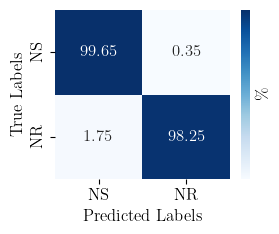

In [227]:
# Extract the top 2 features from the test dataset
X_test_top_features = np.array(X_test_02_bior33_NRNS_norm)[:, top_features_indices]

scaler = StandardScaler()
X_test_top_features_scaled = scaler.fit_transform(X_test_top_features) 

X_test_with_intercept = sm.add_constant(X_test_top_features_scaled)

y_test_pred_probs = logit_model_2d.predict(X_test_with_intercept)

y_test_pred_labels = np.where(y_test_pred_probs > 0.5, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)
conf_matrix = confusion_matrix(y_test_02_bior33_NRNS_norm, y_test_pred_labels)
precision = precision_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)
recall = recall_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)
f1 = f1_score(y_test_02_bior33_NRNS_norm, y_test_pred_labels)
#fpr, tpr, thresholds = roc_curve(y_test_02_bior33_NRNS_norm, y_test_pred_probs)
#roc_auc = auc(fpr, tpr)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"AUC: {roc_auc}")

cm_percentages = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
classes = ['NS', 'NR']
plt.figure(figsize=(3, 2.5))
sns.heatmap(cm_percentages, annot=True, fmt=".2%", cbar = True, cmap='Blues', cbar_kws={'ticks': [0, 20, 40, 60, 80, 100]}, xticklabels=classes, yticklabels=classes)  # Use .2% to format numbers as percentages
plt.gcf().axes[-1].set_ylabel('$\%$', size=12)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_2Dlogreg_cm.png", dpi=300)
plt.show()

In [57]:
from joblib import dump

dump(logit_model_2d, 'NRNS_2Dlogreg_model.pkl')

['NRNS_2Dlogreg_model.pkl']

##### t-test between XGBoost and logreg

In [226]:
from scipy.stats import ttest_rel

# Placeholder variables for predictions - replace these with your actual predictions
predictions_model_1 = predictions_best_model_XG_02_bior33_NRNS_norm
predictions_model_2 = y_test_pred_labels

# Convert predictions to 0/1 correct/incorrect flags compared to the true labels
correct_model_1 = (predictions_model_1 == y_test_02_bior33_NRNS_norm).astype(int)
correct_model_2 = (predictions_model_2 == y_test_02_bior33_NRNS_norm).astype(int)

# Perform the paired t-test on the correctness of the two models
t_statistic, p_value = ttest_rel(correct_model_1, correct_model_2)

print(f"T-statistic: {t_statistic:20f}, P-value: {p_value:20f}")


T-statistic:             0.576788, P-value:             0.564462


Optimization terminated successfully.
         Current function value: 0.050040
         Iterations 10


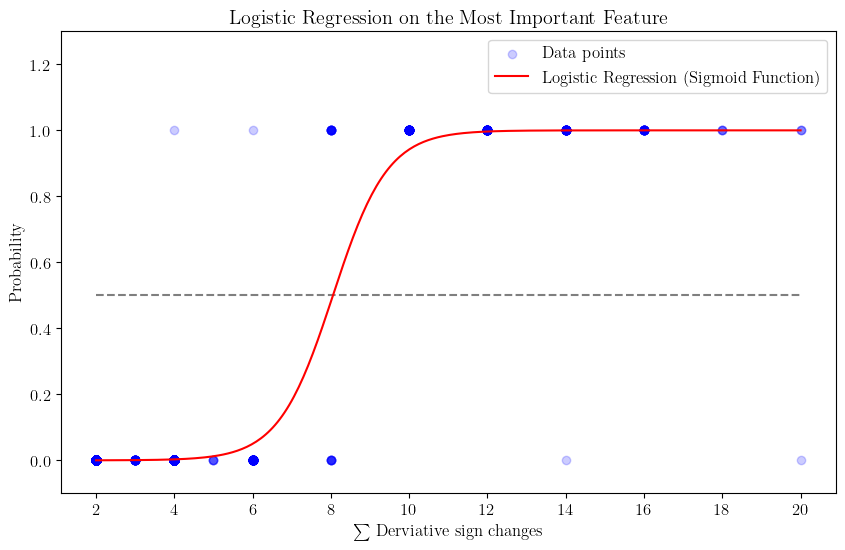

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1198
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.8890
Time:                        20:15:32   Log-Likelihood:                -59.948
converged:                       True   LL-Null:                       -540.31
Covariance Type:            nonrobust   LLR p-value:                6.198e-211
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5421      1.003    -11.508      0.000     -13.508      -9.576
x1             1.4333      0.132     10.827      0.000       1.174       1.693


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming clf_pipeline['XG'] is your trained XGBoost model
xg_model = clf_pipeline.named_steps['XG']

# Get feature importances and identify the most important feature
feature_importances = xg_model.feature_importances_
most_important_feature_index = 17 # or np.argmax(feature_importances) for automatic detection

# Extract the most important feature and target variable
X_important_feature = np.array(X_train_02_bior33)[:, most_important_feature_index]
y = y_train_02_bior33

# Fit logistic regression
X_with_intercept = sm.add_constant(X_important_feature)  # Adds a constant term to the predictor
logit_model = sm.Logit(y, X_with_intercept).fit()

# To visualize the fit, we need to create a sequence of predictions across the range of X values
# This requires calculating the sigmoid function manually or plotting probabilities for classification
x_range = np.linspace(X_important_feature.min(), X_important_feature.max(), 300)
x_range_with_intercept = sm.add_constant(x_range)

# Predicting probabilities
y_pred = logit_model.predict(x_range_with_intercept)

# Plotting
plt.figure(figsize=(10, 6))
plt.hlines(0.5, X_important_feature.min(), X_important_feature.max(), color='k', linestyle='--', alpha=0.5)
plt.scatter(X_important_feature, y, color='blue', label='Data points', alpha = 0.2)
plt.plot(x_range, y_pred, color='red', label='Logistic Regression (Sigmoid Function)')

plt.xlabel(f'{feature_names[most_important_feature_index]}')
plt.ylabel('Probability')
plt.title('Logistic Regression on the Most Important Feature')
plt.legend()
plt.xticks(np.arange(2,21,2))
plt.ylim(-0.1, 1.3)
plt.show()

# You can print the summary of the logistic regression model to see how it performs
print(logit_model.summary())

y_pred_probs = logit_model.predict(X_with_intercept)

# Convert probabilities to class predictions using 0.5 as the threshold
y_pred_class = (y_pred_probs >= 0.5).astype(int)



In [ ]:
# First, prepare the test set similar to how we prepared the training set:
# Assuming X_test_02_bior33 is your test set
X_test_important_feature = np.array(X_test_02_bior33)[:, most_important_feature_index]
X_test_with_intercept = sm.add_constant(X_test_important_feature)

# Predicting probabilities for the test set
y_test_pred_probs = logit_model.predict(X_test_with_intercept)

# Convert probabilities to class labels based on a threshold (e.g., 0.5)
y_test_pred_labels = np.where(y_test_pred_probs > 0.5, 1, 0)

accuracy = accuracy_score(y_test_02_bior33, y_test_pred_labels)

conf_matrix = confusion_matrix(y_test_02_bior33, y_test_pred_labels)

precision = precision_score(y_test_02_bior33, y_test_pred_labels)

recall = recall_score(y_test_02_bior33, y_test_pred_labels)

f1 = f1_score(y_test_02_bior33, y_test_pred_labels)

fpr, tpr, thresholds = roc_curve(y_test_02_bior33, y_test_pred_probs)
roc_auc = auc(fpr, tpr)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")

# Optionally, you can plot the ROC curve:
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


Accuracy: 0.9844357976653697
Confusion Matrix:
[[428   0]
 [  8  78]]
Precision: 1.0
Recall: 0.9069767441860465
F1 Score: 0.951219512195122
AUC: 0.99978265594436


##### Capture rates

In [58]:
from joblib import load

logit_model_2d = load('NRNS_2Dlogreg_model.pkl')

In [63]:
features_list_mix = unpickle("NRNS_features_list_mix.pkl")
event_time_padded_mix = unpickle("NRNS_event_time_padded_mix.pkl")
DWT_rec_padded_mix = unpickle("NRNS_DWT_rec_padded_mix.pkl")

In [60]:
scaler = RobustScaler()
features_mixed_scaled = scaler.fit_transform(features_list_mix)

In [61]:
predictions_02_bior33_NRNS = best_model_XG_random_02_bior33_NRNS.predict(features_list_mix)
len(predictions_02_bior33_NRNS[predictions_02_bior33_NRNS == 0]), len(predictions_02_bior33_NRNS[predictions_02_bior33_NRNS == 1])

(574, 111)

In [64]:
DWT_rec_02_bior33_NRNS_labels_0 = [DWT_rec_padded_mix[i] for i, label in enumerate(predictions_02_bior33_NRNS) if label == 0]
DWT_rec_02_bior33_NRNS_labels_1 = [DWT_rec_padded_mix[i] for i, label in enumerate(predictions_02_bior33_NRNS) if label == 1]
time_02_bior33_NRNS_labels_0 = [event_time_padded_mix[i] for i, label in enumerate(predictions_02_bior33_NRNS) if label == 0]
time_02_bior33_NRNS_labels_1 = [event_time_padded_mix[i] for i, label in enumerate(predictions_02_bior33_NRNS) if label == 1]


In [65]:
time_between_02_bior33_NRNS_label_0 = time_between_multirun(time_02_bior33_NRNS_labels_0)
time_between_02_bior33_NRNS_label_1 = time_between_multirun(time_02_bior33_NRNS_labels_1)

In [67]:
def model(t, r1, r2):
    return r1 * np.exp(-r2 * t)

python(7559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


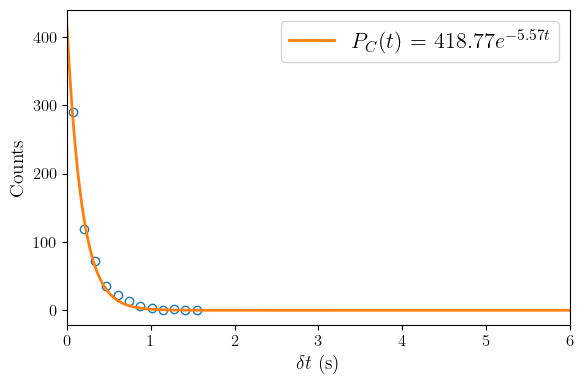

errors label 0 [14.8267  0.2629]


In [258]:
# Data for label 0
plt.figure(figsize=(6, 4))
no_bins = 12
counts, bin_edges = np.histogram(time_between_02_bior33_NRNS_label_0, bins=no_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params_0, cov_0 = curve_fit(model, bin_centers, counts, p0=[60, 0.3])

# Plot for label 0
plt.plot(bin_centers, counts, color='tab:blue', linestyle="", marker='o', fillstyle='none', markeredgewidth=1)
plt.plot(np.linspace(0,20,1000), model(np.linspace(0,20,1000), *params_0), color='tab:orange', linewidth=2, label=f'$P_C(t)$ = {params_0[0]:.2f}$e^{{-{params_0[1]:.2f}t}}$')
plt.xlim(0, 6)
plt.xlabel('$\delta t$ (s)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_02_bior33_deltaTplot_label_0_2.png", dpi = 500)
plt.show()

errors_label_0 = np.sqrt(np.diag(cov_0))
print("errors label 0", errors_label_0)

python(6262) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6263) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


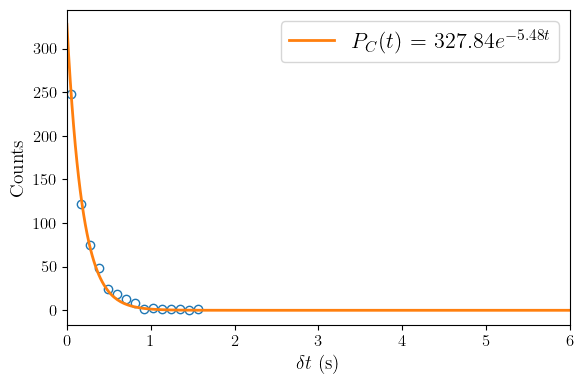

errors label 0 [8.7926 0.2   ]


In [230]:
# Data for label 0
plt.figure(figsize=(6, 4))
no_bins = 15
counts, bin_edges = np.histogram(time_between_02_bior33_NRNS_label_0, bins=no_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params_0, cov_0 = curve_fit(model, bin_centers, counts, p0=[60, 0.3])

# Plot for label 0
plt.plot(bin_centers, counts, color='tab:blue', linestyle="", marker='o', fillstyle='none', markeredgewidth=1)
plt.plot(np.linspace(0,20,1000), model(np.linspace(0,20,1000), *params_0), color='tab:orange', linewidth=2, label=f'$P_C(t)$ = {params_0[0]:.2f}$e^{{-{params_0[1]:.2f}t}}$')
plt.xlim(0, 6)
plt.xlabel('$\delta t$ (s)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_02_bior33_deltaTplot_label_0_2.png", dpi = 500)
plt.show()

errors_label_0 = np.sqrt(np.diag(cov_0))
print("errors label 0", errors_label_0)

python(7554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


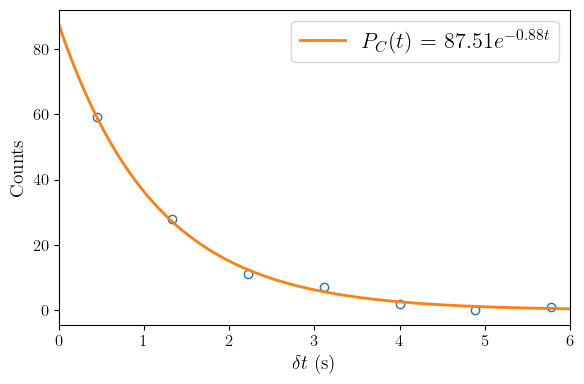

errors label 1 [2.1194 0.0284]


In [257]:
# Data for label 1
plt.figure(figsize=(6, 4))
no_bins = 9
counts, bin_edges = np.histogram(time_between_02_bior33_NRNS_label_1, bins=no_bins, range = (0, 8))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params_1, cov_1 = curve_fit(model, bin_centers, counts, p0=[60, 0.3])

# Plot for label 1
plt.plot(bin_centers, counts, color='tab:blue', linestyle="", marker='o', fillstyle='none', markeredgewidth=1)
plt.plot(np.linspace(0,20,1000), model(np.linspace(0,20,1000), *params_1), color='tab:orange', linewidth=2, label=f'$P_C(t)$ = {params_1[0]:.2f}$e^{{-{params_1[1]:.2f}t}}$')
plt.xlim(0, 6)
plt.xlabel('$\delta t$ (s)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_02_bior33_deltaTplot_label_1_2.png", dpi = 500)
plt.show()

errors_label_1 = np.sqrt(np.diag(cov_1))
print("errors label 1", errors_label_1)

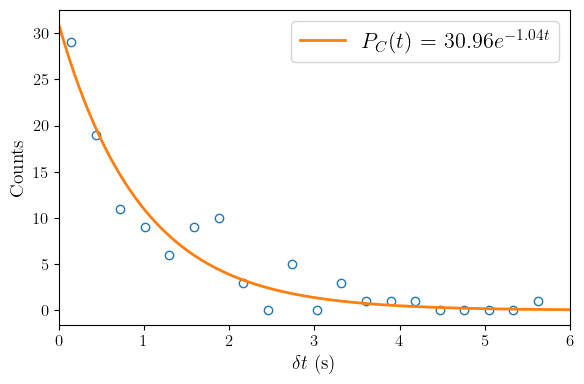

errors label 1 [2.5369 0.1193]


In [233]:
# Data for label 1
plt.figure(figsize=(6, 4))
no_bins = 20
counts, bin_edges = np.histogram(time_between_02_bior33_NRNS_label_1, bins=no_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
params_1, cov_1 = curve_fit(model, bin_centers, counts, p0=[60, 0.3])

# Plot for label 1
plt.plot(bin_centers, counts, color='tab:blue', linestyle="", marker='o', fillstyle='none', markeredgewidth=1)
plt.plot(np.linspace(0,20,1000), model(np.linspace(0,20,1000), *params_1), color='tab:orange', linewidth=2, label=f'$P_C(t)$ = {params_1[0]:.2f}$e^{{-{params_1[1]:.2f}t}}$')
plt.xlim(0, 6)
plt.xlabel('$\delta t$ (s)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
#plt.savefig("MSci_python_images/NRNS_02_bior33_deltaTplot_label_1_2.png", dpi = 500)
plt.show()

errors_label_1 = np.sqrt(np.diag(cov_1))
print("errors label 1", errors_label_1)

In [259]:
params_0[1], errors_label_0[1], params_1[1], errors_label_1[1]

(5.573221085951183,
 0.26290159764200705,
 0.8792798572974944,
 0.02840251618941763)

In [256]:
ratio_01 = params_0[1] / params_1[1]

error_ratio_labels_NRNS = ratio_01 * ((errors_label_0[1] / params_0[1]) ** 2 + (errors_label_1[1] / params_1[1]) ** 2) ** 0.5

print(f"error in NS/NR ratio: {ratio_01} $\pm$ {error_ratio_labels_NRNS}")

error in NS/NR ratio: 6.338392765052898 $\pm$ 0.3623790258662332


In [242]:
def plot_many_capturerates(times_between_event, no_splits, no_bins, x_lim, range_bins = None, filename = None):
    #fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 7))
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 3.5))
    axes = axes.flatten() 

    np.random.seed(42)
    np.random.shuffle(times_between_event)

    subset_size = len(times_between_event) // no_splits
    subsets = [times_between_event[i*subset_size:(i+1)*subset_size] for i in range(no_splits)]

    capture_rate_many = []
    capture_rate_many_errors = []


    for i in range(no_splits):
        if range_bins is not None:
            counts, bin_edges = np.histogram(subsets[i], bins=no_bins, range=(0,range_bins))
        else:
            counts, bin_edges = np.histogram(subsets[i], bins=no_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        params_sub, cov_sub = curve_fit(model, bin_centers, counts, p0=[60, 0.3])
        capture_rate_many.append(params_sub[1])
        capture_rate_many_errors.append(np.sqrt(np.diag(cov_sub))[1])
        
        axes[i].plot(bin_centers, counts, color='tab:blue', linestyle="", marker='o', fillstyle='none', markeredgewidth=1)
        axes[i].plot(np.linspace(0,20,1000), model(np.linspace(0,20,1000), *params_sub), color='tab:orange', linewidth=2, label=f'$P_C(t)$ = {params_sub[0]:.2f}$e^{{-{params_sub[1]:.2f}t}}$')
        axes[i].set_xlim(x_lim[0], x_lim[1])
        axes[i].legend(fontsize = 14)
        
        if i in [0, 5]:
            axes[i].set_ylabel('Counts', fontsize = 14)
        #if i in [5, 6, 7, 8, 9]:
        axes[i].set_xlabel('$\delta t$ (s)', fontsize = 14)

    plt.tight_layout()
    if filename is not None:
        plt.savefig(f"MSci_python_images/{filename}.png", dpi=500)
    plt.show()
    
    return capture_rate_many, capture_rate_many_errors

python(6349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6359) MallocStackLoggin

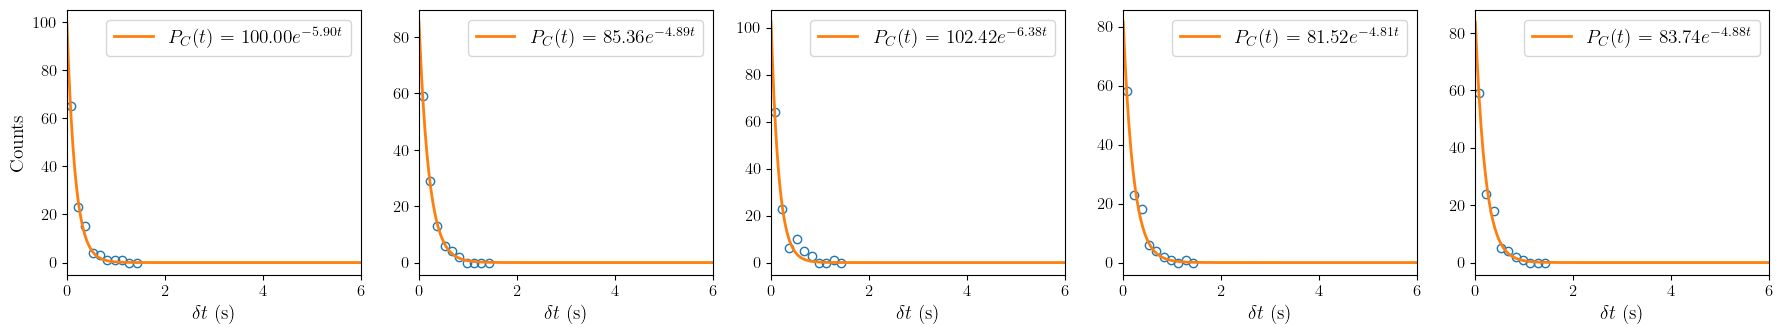

In [243]:
#capture_rate_label_0_many, capture_rate_label_0_many_errors = plot_many_capturerates(time_between_02_bior33_NRNS_label_0, 5, 10, range_bins= 1.5 , x_lim=[0,6], filename="NRNS_02_bior33_deltaTplot_label_0_many")
capture_rate_label_0_many, capture_rate_label_0_many_errors = plot_many_capturerates(time_between_02_bior33_NRNS_label_0, 5, 10, range_bins= 1.5 , x_lim=[0,6])

In [237]:
len(time_between_02_bior33_NRNS_label_0), len(time_between_02_bior33_NRNS_label_1)

(565, 108)

python(6368) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6369) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6370) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6372) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6373) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6378) MallocStackLoggin

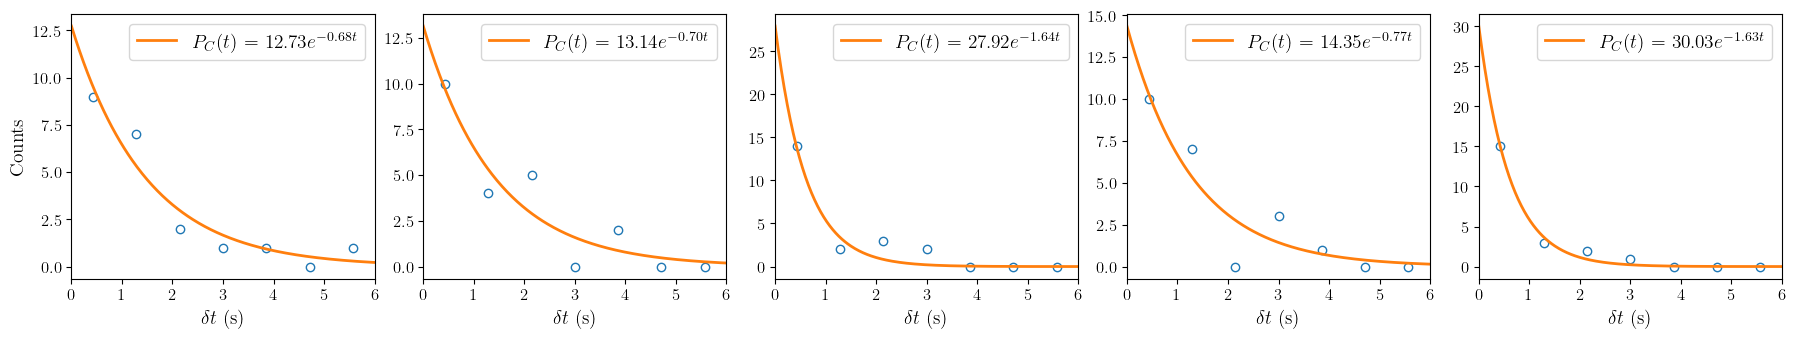

In [244]:
#capture_rate_label_1_many, capture_rate_label_1_many_errors = plot_many_capturerates(time_between_02_bior33_NRNS_label_1, 5, 7, range_bins=6, x_lim=[0,6], filename="NRNS_02_bior33_deltaTplot_label_1_many")
capture_rate_label_1_many, capture_rate_label_1_many_errors = plot_many_capturerates(time_between_02_bior33_NRNS_label_1, 5, 7, range_bins=6, x_lim=[0,6])

In [122]:
ratio_many_0_1 = np.array(capture_rate_label_0_many) / np.array(capture_rate_label_1_many)

In [123]:
ratio_many_0_1_errors = ratio_many_0_1 * np.sqrt((np.array(capture_rate_label_0_many_errors) / np.array(capture_rate_label_0_many))**2 + (np.array(capture_rate_label_1_many_errors) / np.array(capture_rate_label_1_many))**2)

In [121]:
ratio_many_NRNS = unpickle("NRNS_ttest_ratio_many.pkl")

In [145]:
t_stat, p_value = stats.ttest_ind(ratio_many_NRNS, ratio_many_0_1, equal_var=False)

print(f"Welch's T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Welch's T-statistic: -0.6020493079980919
P-value: 0.576472210589686
